In [5]:
import sys
import os

# Go up to project root (from inside training/)
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
labels = {"squats": 0, "deadlifts": 1, "shoulder_press": 2}
data = {exercise: {"valid_frames": [], "blank_frames": [], "total_frames": []} for exercise in labels}

for exercise, label in labels.items():
    folder_path = os.path.join("../../data/keypoints", exercise)
    if not os.path.exists(folder_path):
        print(f"Warning: {folder_path} does not exist")
        continue

    for file in os.listdir(folder_path):
        if file.endswith(".npy"):
            path = os.path.join(folder_path, file)
            try:
                sample = np.load(path)  # Shape: (frames, 33, 4)
                total_frames = sample.shape[0]
                
                # A frame is blank if all 33 keypoints are zero
                blank_frames = np.sum(np.all(sample == 0, axis=(1, 2)))
                valid_frames = total_frames - blank_frames

                data[exercise]["valid_frames"].append(valid_frames)
                data[exercise]["blank_frames"].append(blank_frames)
                data[exercise]["total_frames"].append(total_frames)
                
            except Exception as e:
                print(f"Error loading {path}: {e}")

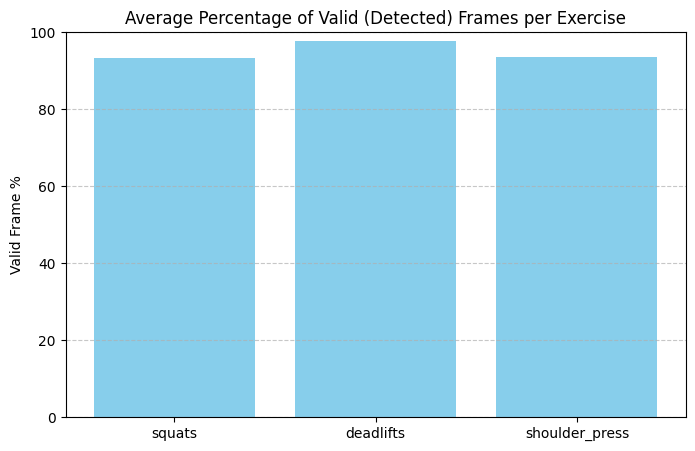

In [16]:
avg_valid_ratios = {
    ex: (np.sum(data[ex]["valid_frames"]) / np.sum(data[ex]["total_frames"])) * 100
    for ex in data
}

plt.figure(figsize=(8, 5))
plt.bar(avg_valid_ratios.keys(), avg_valid_ratios.values(), color='skyblue')
plt.title("Average Percentage of Valid (Detected) Frames per Exercise")
plt.ylabel("Valid Frame %")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
summary = []

for ex in data:
    total_samples = len(data[ex]["total_frames"])
    total_valid = np.sum(data[ex]["valid_frames"])
    total_blank = np.sum(data[ex]["blank_frames"])
    total_frames = np.sum(data[ex]["total_frames"])
    valid_ratio = (total_valid / total_frames) * 100

    summary.append({
        "Exercise": ex,
        "Samples": total_samples,
        "Total Frames": total_frames,
        "Valid Frames": total_valid,
        "Blank Frames": total_blank,
        "Valid Frame %": f"{valid_ratio:.2f}%"
    })

df = pd.DataFrame(summary)
print(df)


         Exercise  Samples  Total Frames  Valid Frames  Blank Frames  \
0          squats      892        103516         96484          7032   
1       deadlifts      672         82154         80209          1945   
2  shoulder_press      660         53600         50201          3399   

  Valid Frame %  
0        93.21%  
1        97.63%  
2        93.66%  
